In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [204]:
def calc_optimal_mu_alpha_0(alphas, taus):
    N = len(alphas)

    stau = sum(taus)
    salpha = sum(alphas)
    salpha2 = sum([alpha**2 for alpha in alphas])
    salphatau = sum([alpha * tau for alpha, tau in zip(alphas, taus)])
    
    mu = (salpha * stau - N * salphatau) / (salpha**2 - N * salpha2)

    alpha_0 = (stau * salpha2 - salphatau * salpha) / (salpha * stau - N * salphatau)
    
    return mu, alpha_0

def calc_energy_consumption(alphas, taus, dt = 0.01, mu = 0, alpha_0 = 0, K = 2.2):
    E = 0
    
    for alpha, tau in zip(alphas, taus):
        E += K * (tau - mu * (alpha - alpha_0))**2 * dt
    
    return E


## Baseline

In [408]:
# for plot
df = pd.read_csv('Without_spring_baseline.csv')
i = 200
start_idx = 0
while(1):
    i+=1
    if math.isclose(df.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=100
        else:
            end_idx = i
            break

df2 = df.iloc[[i for i in range(start_idx, end_idx)]]
df2 = df2.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df)
while(1):
    i-=1
    if math.isclose(df.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

2285.8590532116614

In [409]:
# optimal parameters
alphas = df.loc[[i for i in range(start_idx,last_idx)], 'Angle'].to_numpy()
taus =  - df.loc[[i for i in range(start_idx,last_idx)], 'Torque'].to_numpy()
mu, alpha_0 = calc_optimal_mu_alpha_0(alphas, taus)
print(mu)
print(alpha_0)

8.542061264124817
-2.233708751380607


In [252]:
# for plot
df3 = pd.read_csv('With_spring_baseline.csv')
i = 200
start_idx = 0

while(1):
    i+=1
    if math.isclose(df3.loc[i, 'Angle'], -0.58, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i
            break

df4 = df3.iloc[[i for i in range(start_idx, end_idx)]]
df4 = df4.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df3)
while(1):
    i-=1
    if math.isclose(df3.loc[i, 'Angle'], -0.58, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df3.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df3.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

14.194569296641637

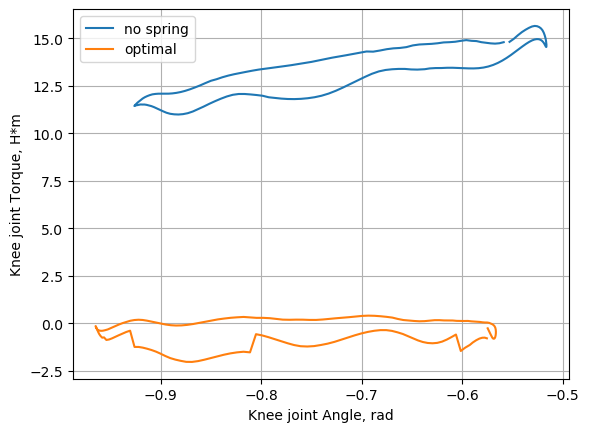

In [235]:
plt.plot(df2['Angle'].to_numpy(), -df2['Torque'].to_numpy(), label = 'no spring')
plt.plot(df4['Angle'].to_numpy(), -df4['Torque'].to_numpy(), label = 'optimal')
plt.xlabel('Knee joint Angle, rad')
plt.ylabel('Knee joint Torque, H*m')
plt.legend()
plt.grid()

## Amplitude

Amplitude changed from 0.05 to 0.08

In [412]:
# for plot
df = pd.read_csv('Without_spring_amp.csv')
i = 250
start_idx = 0
while(1):
    i+=1
    if math.isclose(df.loc[i, 'Angle'], -0.4, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i + 5
            break

df2 = df.iloc[[i for i in range(start_idx, end_idx)]]
df2 = df2.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df)
while(1):
    i-=1
    if math.isclose(df.loc[i, 'Angle'], -0.4, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

2114.1796673307913

In [413]:
# optimal parameters
alphas = df.loc[[i for i in range(start_idx,last_idx)], 'Angle'].to_numpy()
taus = - df.loc[[i for i in range(start_idx,last_idx)], 'Torque'].to_numpy()
mu, alpha_0 =  calc_optimal_mu_alpha_0(alphas, taus)
print(mu)
print(alpha_0)

8.765996653475588
-2.151089801969219


In [250]:
# for plot
df3 = pd.read_csv('With_spring_amp.csv')
i = 200
start_idx = 0

while(1):
    i+=1
    if math.isclose(df3.loc[i, 'Angle'], -0.45, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i
            break

df4 = df3.iloc[[i for i in range(start_idx, end_idx)]]
df4 = df4.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df3)
while(1):
    i-=1
    if math.isclose(df3.loc[i, 'Angle'], -0.45, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df3.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df3.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

30.194028739054986

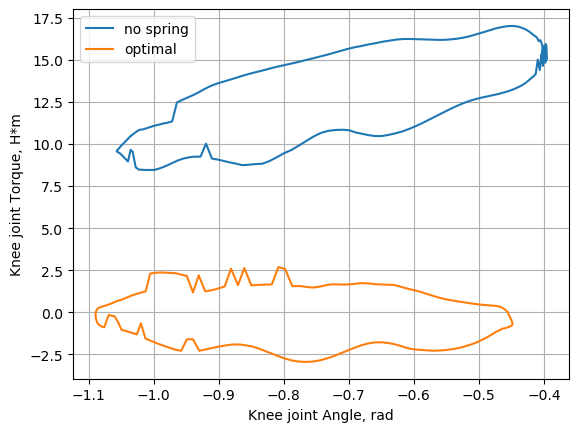

In [249]:
plt.plot(df2['Angle'].to_numpy(), -df2['Torque'].to_numpy(), label = 'no spring')
plt.plot(df4['Angle'].to_numpy(), -df4['Torque'].to_numpy(), label = 'optimal')
plt.xlabel('Knee joint Angle, rad')
plt.ylabel('Knee joint Torque, H*m')
plt.legend()
plt.grid()

## Initial high

Initial high changed from -0.2 to -0.15

In [414]:
# for plot
df = pd.read_csv('Without_spring_high.csv')
i = 300
start_idx = 0
while(1):
    i+=1
    if math.isclose(df.loc[i, 'Angle'], -0.33, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i + 5
            break

df2 = df.iloc[[i for i in range(start_idx, end_idx)]]
df2 = df2.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df)
while(1):
    i-=1
    if math.isclose(df.loc[i, 'Angle'], -0.33, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

2627.086144171025

In [415]:
# optimal parameters
alphas = df.loc[[i for i in range(start_idx,last_idx)], 'Angle'].to_numpy()
taus = - df.loc[[i for i in range(start_idx,last_idx)], 'Torque'].to_numpy()
mu, alpha_0 =  calc_optimal_mu_alpha_0(alphas, taus)
print(mu)
print(alpha_0)

7.048302757782847
-2.524261209884519


In [297]:
# for plot
df3 = pd.read_csv('With_spring_high.csv')
i = 300
start_idx = 0

while(1):
    i+=1
    if math.isclose(df3.loc[i, 'Angle'], -0.38, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i
            break

df4 = df3.iloc[[i for i in range(start_idx, end_idx)]]
df4 = df4.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df3)
while(1):
    i-=1
    if math.isclose(df3.loc[i, 'Angle'], -0.38, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df3.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df3.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

103.12598113815027

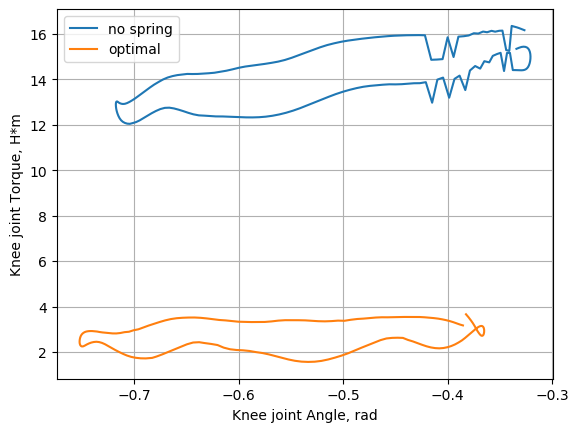

In [298]:
plt.plot(df2['Angle'].to_numpy(), -df2['Torque'].to_numpy(), label = 'no spring')
plt.plot(df4['Angle'].to_numpy(), -df4['Torque'].to_numpy(), label = 'optimal')
plt.xlabel('Knee joint Angle, rad')
plt.ylabel('Knee joint Torque, H*m')
plt.legend()
plt.grid()

## Mass

Mass of the upper part increased up to 4 kg

In [416]:
# for plot
df = pd.read_csv('Without_spring_mass.csv')
i = 250
start_idx = 0
while(1):
    i+=1
    if math.isclose(df.loc[i, 'Angle'], -0.5, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i + 5
            break

df2 = df.iloc[[i for i in range(start_idx, end_idx)]]
df2 = df2.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df)
while(1):
    i-=1
    if math.isclose(df.loc[i, 'Angle'], -0.5, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

6813.907721405112

In [418]:
# optimal parameters
alphas = df.loc[[i for i in range(start_idx,last_idx)], 'Angle'].to_numpy()
taus = - df.loc[[i for i in range(start_idx,last_idx)], 'Torque'].to_numpy()
mu, alpha_0 =  calc_optimal_mu_alpha_0(alphas, taus)
print(mu)
print(alpha_0)

13.781681734129437
-2.2854606731765905


In [353]:
# for plot
df3 = pd.read_csv('With_spring_mass.csv')
i = 400
start_idx = 0

while(1):
    i+=1
    if math.isclose(df3.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i
            break

df4 = df3.iloc[[i for i in range(start_idx, end_idx)]]
df4 = df4.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df3)
while(1):
    i-=1
    if math.isclose(df3.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df3.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df3.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

27.9368011320842

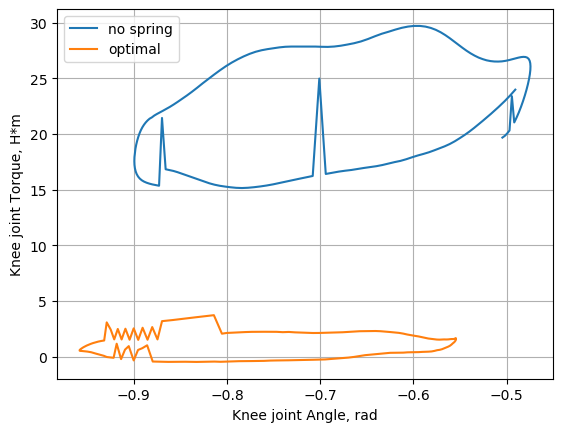

In [354]:
plt.plot(df2['Angle'].to_numpy(), -df2['Torque'].to_numpy(), label = 'no spring')
plt.plot(df4['Angle'].to_numpy(), -df4['Torque'].to_numpy(), label = 'optimal')
plt.xlabel('Knee joint Angle, rad')
plt.ylabel('Knee joint Torque, H*m')
plt.legend()
plt.grid()

## High frequency

Frequency increased from 100hz up to 200Hz

In [440]:
# for plot
df = pd.read_csv('Without_spring_freq_high.csv')
i = 400
start_idx = 0
while(1):
    i+=1
    if math.isclose(df.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=90
        else:
            end_idx = i + 5
            break

df2 = df.iloc[[i for i in range(start_idx, end_idx)]]
df2 = df2.astype(float)

# energy consumption
i = len(df)
while(1):
    i-=1
    if math.isclose(df.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        last_idx = i
        break

# df2 = df.iloc[[i for i in range(start_idx, last_idx)]]
# df2 = df2.astype(float)

calc_energy_consumption(df.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

2365.245736676609

In [420]:
# optimal parameters
alphas = df.loc[[i for i in range(start_idx,last_idx)], 'Angle'].to_numpy()
taus = - df.loc[[i for i in range(start_idx,last_idx)], 'Torque'].to_numpy()
mu, alpha_0 =  calc_optimal_mu_alpha_0(alphas, taus)
print(mu)
print(alpha_0)

17.783997156512097
-1.417251959564079


In [425]:
# for plot
df3 = pd.read_csv('With_spring_freq_high.csv')
i = 400
start_idx = 0

while(1):
    i+=1
    if math.isclose(df3.loc[i, 'Angle'], -0.6, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i
            break

df4 = df3.iloc[[i for i in range(start_idx, end_idx)]]
df4 = df4.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df3)
while(1):
    i-=1
    if math.isclose(df3.loc[i, 'Angle'], -0.6, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df3.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df3.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

44.68272924668329

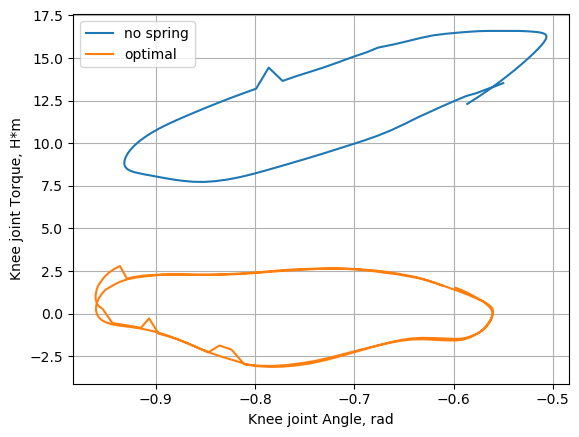

In [428]:
plt.plot(df2['Angle'].to_numpy(), -df2['Torque'].to_numpy(), label = 'no spring')
plt.plot(df4['Angle'].to_numpy(), -df4['Torque'].to_numpy(), label = 'optimal')
# plt.plot(df6['Angle'].to_numpy(), -df6['Torque'].to_numpy(), label = 'optimal')
plt.xlabel('Knee joint Angle, rad')
plt.ylabel('Knee joint Torque, H*m')
plt.legend()
plt.grid()

## Low frequency

Frequency decreased from 100hz up to 50Hz

In [458]:
# for plot
df = pd.read_csv('Without_spring_freq_low.csv')
i = 800
start_idx = 0
while(1):
    i+=1
    if math.isclose(df.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=90
        else:
            end_idx = i + 5
            break

df2 = df.iloc[[i for i in range(start_idx, end_idx)]]
df2 = df2.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df)
while(1):
    i-=1
    if math.isclose(df.loc[i, 'Angle'], -0.55, abs_tol=0.005):
        last_idx = i
        break

# df2 = df.iloc[[i for i in range(start_idx, last_idx)]]
# df2 = df2.astype(float)

calc_energy_consumption(df.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

4193.6346211589835

In [459]:
# optimal parameters
alphas = df.loc[[i for i in range(start_idx,last_idx)], 'Angle'].to_numpy()
taus = - df.loc[[i for i in range(start_idx,last_idx)], 'Torque'].to_numpy()
mu, alpha_0 =  calc_optimal_mu_alpha_0(alphas, taus)
print(mu)
print(alpha_0)

6.071617257098036
-2.843402042198241


In [460]:
# for plot
df3 = pd.read_csv('With_spring_freq_low.csv')
i = 800
start_idx = 0

while(1):
    i+=1
    if math.isclose(df3.loc[i, 'Angle'], -0.6, abs_tol=0.005):
        if start_idx == 0:
            start_idx = i
            i+=170
        else:
            end_idx = i
            break

df4 = df3.iloc[[i for i in range(start_idx, end_idx)]]
df4 = df4.astype(float)
# print(start_idx)
# print(end_idx)

# energy consumption
i = len(df3)
while(1):
    i-=1
    if math.isclose(df3.loc[i, 'Angle'], -0.6, abs_tol=0.005):
        last_idx = i
        break

calc_energy_consumption(df3.loc[[i for i in range(start_idx, last_idx)], 'Angle'].to_list(), df3.loc[[i for i in range(start_idx, last_idx)], 'Torque'].to_list())

6.38378146902246

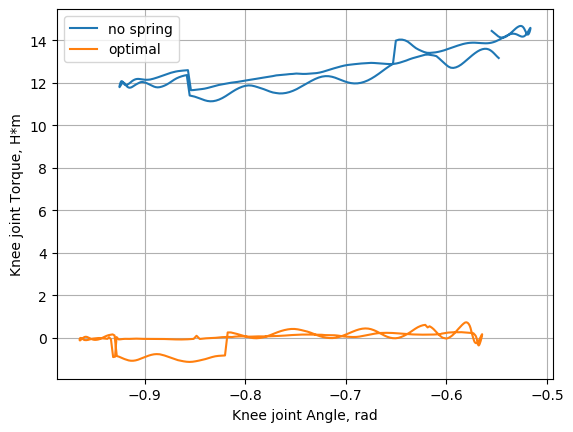

In [461]:
plt.plot(df2['Angle'].to_numpy(), -df2['Torque'].to_numpy(), label = 'no spring')
plt.plot(df4['Angle'].to_numpy(), -df4['Torque'].to_numpy(), label = 'optimal')
# plt.plot(df6['Angle'].to_numpy(), -df6['Torque'].to_numpy(), label = 'optimal')
plt.xlabel('Knee joint Angle, rad')
plt.ylabel('Knee joint Torque, H*m')
plt.legend()
plt.grid()